In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [2]:
maindir = "../small_output/"
dr = xr.open_dataarray(maindir+'plume01_entropy_all.nc',decode_times=False)
dr = dr/dr.isel(time=0) # normalize by initial condition

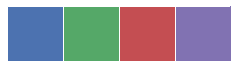

In [3]:
palette = sns.color_palette()[0:4]
sns.palplot(palette)

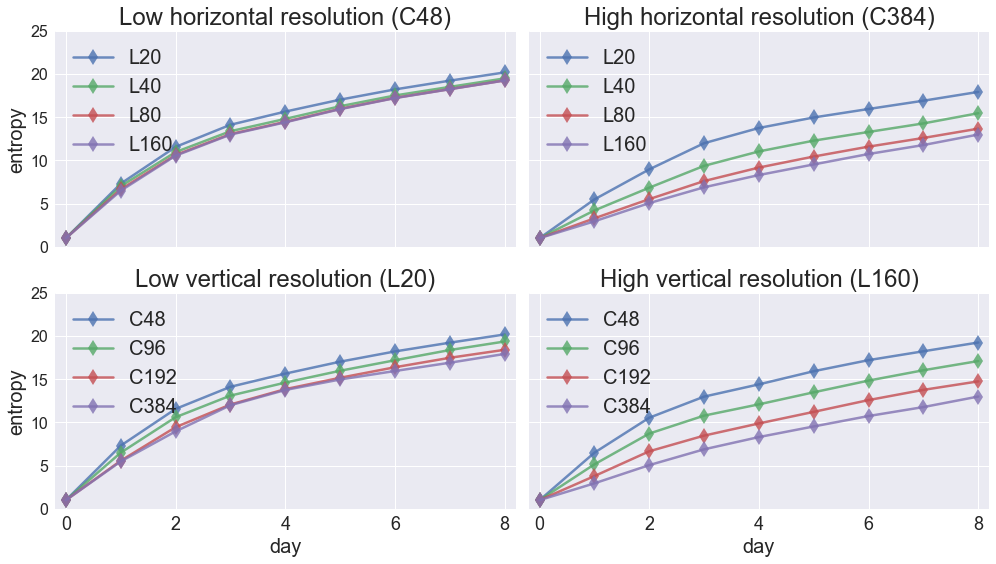

In [4]:
Vres_list = [20,40,80,160]
Hres_list = [48,96,192,384]

titlesize, labelsize = [24,20]
fig, axes = plt.subplots(2,2,figsize=[14,8])

color_list = palette
marker_list = ['d','o','s','D']
alpha = 0.8
linewidth = 2.5
linestyle = '-'
markersize = 12

def set_detail(ax):
    ax.set_ylim([0,25]);ax.set_xlim([-0.2,8.2])
    ax.legend(fontsize=labelsize, loc=2)
    ax.xaxis.set_tick_params(labelsize=18)
    ax.yaxis.set_tick_params(labelsize=16)

for i,Hres in enumerate(Hres_list[0:4:3]):
    ax = axes[0][i]
    if Hres == 48:
        ax.set_title('Low horizontal resolution (C48)',fontsize=titlesize)
    if Hres == 384:
        ax.set_title('High horizontal resolution (C384)',fontsize=titlesize)
        
    for j,Vres in enumerate(Vres_list):
        marker = marker_list[0]; color = color_list[j]; 
        
        ax.plot(dr.sel(Hres=Hres,Vres=Vres),label='L{0}'.format(Vres),
                linestyle=linestyle,linewidth=linewidth,markersize=markersize,
                marker=marker,color=color,alpha=alpha)
    set_detail(ax)
    
    ax.set_xticklabels([], [])
    if i==0:
        ax.set_ylabel('entropy',fontsize=labelsize)
    else:
        ax.set_yticklabels([], [])
        
for i,Vres in enumerate(Vres_list[0:4:3]):
    ax = axes[1][i]
    if Vres == 20:
        ax.set_title('Low vertical resolution (L20)',fontsize=titlesize)
    if Vres == 160:
        ax.set_title('High vertical resolution (L160)',fontsize=titlesize)
    
    for j,Hres in enumerate(Hres_list):
        marker = marker_list[0]; color = color_list[j]; 
        
        ax.plot(dr.sel(Hres=Hres,Vres=Vres),label='C{0}'.format(Hres),
                linestyle=linestyle,linewidth=linewidth,markersize=markersize,
                marker=marker,color=color,alpha=alpha)
    set_detail(ax)  
    ax.set_xlabel('day',fontsize=labelsize)
    if i==0:
        ax.set_ylabel('entropy',fontsize=labelsize)
    else:
        ax.set_yticklabels([], [])

fig.tight_layout()
fig.savefig('entropy_trend.png',dpi=200)

# Only last day

/Users/zhuangjw/Research/Computing/miniconda3/envs/geo/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


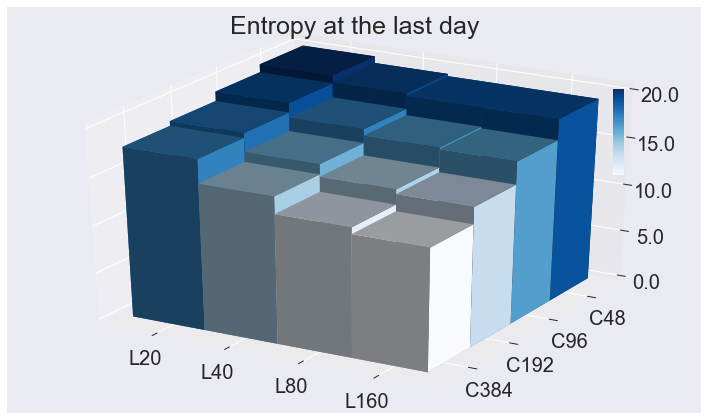

In [5]:
Vlabels = ['L{0}'.format(r) for r in Vres_list]
Hlabels = ['C{0}'.format(r) for r in Hres_list]

import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib.colors as colors

fig, ax = plt.subplots(1,1,figsize=[10,6],subplot_kw=dict(projection='3d'))


testdata = dr.isel(time=-1).values

# Make data.

# fake data
_y = np.arange(4,0,-1)
_x = np.arange(4)
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = testdata.ravel()
bottom = np.zeros_like(top)
width = depth = 1

fracs = (top-testdata.min())
fracs = fracs/fracs.max()
#norm = colors.Normalize(fracs.min(), fracs.max())
norm = colors.Normalize(0, 1)
cmap = cm.Blues(norm(fracs))
#cmap[:,3] = 0.8 #alpha

#top = 25-top
ax.bar3d(x, y, bottom, width, depth, top, color=cmap, alpha=0.2)

ax.set_title('Entropy at the last day', fontsize=25)
ax.set_xticks(_x+0.5); ax.set_xticklabels(Vlabels, fontsize=20)
ax.set_yticks(_y+0.5); ax.set_yticklabels(Hlabels, fontsize=20)
ax.set_zticks(np.arange(0,20.1,5.0)); ax.set_zticklabels(np.arange(0,20.1,5.0), fontsize=20)

ax1 = fig.add_axes([0.86, 0.58, 0.015, 0.20])
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap= cm.Blues,
                                norm=colors.Normalize(0,1),
                                orientation='vertical')
#cb1.set_label('Maximum VMR, v/v',fontsize=16)
cb1.set_ticks([])

plt.tight_layout()
fig.savefig('entropy_lastday.png',dpi=200)

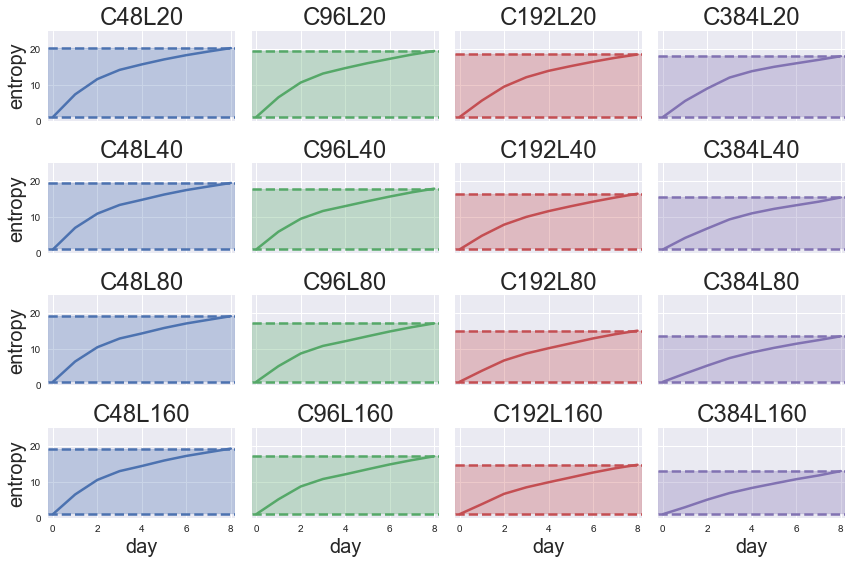

In [6]:
fig, axes = plt.subplots(4,4,figsize=[12,8])

color_list = palette

for i,Hres in enumerate(Hres_list):
    for j,Vres in enumerate(Vres_list):
        ax = axes[j][i]
        color = color_list[i]
        
        dr_temp = dr.sel(Hres=Hres,Vres=Vres)
        ax.plot(dr_temp,label='C{0}L{1}'.format(Hres,Vres),
                linestyle='-',linewidth=linewidth,color=color)
        ax.axhline(dr_temp.isel(time=-1),linewidth=linewidth,linestyle='--',color=color)
        ax.axhline(dr_temp.isel(time=0),linewidth=linewidth,linestyle='--',color=color)
        ax.axhspan(dr_temp.isel(time=0),dr_temp.isel(time=-1), alpha=0.3,color=color)
        
        
        ax.set_ylim([0,25]);ax.set_xlim([-0.2,8.2])

        ax.set_title('C{0}L{1}'.format(Hres,Vres),fontsize=titlesize)
        
        if Hres == 48:
            ax.set_ylabel('entropy',fontsize=labelsize)
        else:
            ax.yaxis.set_ticklabels([])
            
        if Vres == 160:
            ax.set_xlabel('day',fontsize=labelsize)
        else:
            ax.xaxis.set_ticklabels([])
            
        
fig.tight_layout()
#fig.savefig('entropy_4x4plot.png',dpi=200)